# **Radon&HOG**

### **Import**

In [16]:
import cv2
import numpy as np
import tqdm as t
import sklearn.neighbors as sn
import skimage.transform as skt
import matplotlib.pyplot as plt
import pandas as pd

### **Histograms of Oriented Gradients Parameter**

In [17]:
# HOG' s Parameter
featureTr = []; labelTr = [];#สร้าง array เก็บ Feature ที่สกัดข้อมูลเเละชื่อ class เเต่ละรูปภาพ
winSize = (64,64) #ปรับขนาดของ Window
blockSize = (16,16) #ปรับขนาดของบล็อก
blockStride = (4,4) #ปรับขนาดของการขยับของบล็อก
cellSize = (8,8) #กำหนดขนาด cell
nbins = 9#จำนวนบินใน Histogram
derivAperture = 1
winSigma = 4.0 #ปรับ Window ของ Gaussian smoothing
histogramNormType = 0
L2HysThreshold = 2.0000000000000001e-01 #ปรับการหดตัวของ L2-Hys
gammaCorrection = 0 #ปรับว่าต้องประมวลผลก่อนการแก้ไขแกมมาหรือไม่
nlevels = 64 #ปรับการ Quantization
winStride = (4,4) #ปรับขนาดของการขยับของ Window
padding = (4,4) #ปรับการเติมขอบของภาพ
locations = ((10,20),) #จุดของ vector

In [18]:
hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,
histogramNormType,L2HysThreshold,gammaCorrection,nlevels)#สร้าง Obj. ที่ไว้ทำหน้าที่คำนวน HOG

### **HOG and Radon Training**

In [19]:
# Training Image Loader and Feature Extraction
for _classname in t.tqdm(range(1,7)): # loop จำนวน class 1-6
  for _id in range(1,21): # loop เเต่ละรูปภาพ 20 รูป
    path = '/content/drive/MyDrive/ImgRecPJ2/Tr/' + str(_classname) + '/text (' + str(_id) + ').bmp' #ตัวอย่าง path ที่เก็บ= '/content/drive/MyDrive/Tr/6/text (20).bmp'

    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) #ปรับรูปภาพให้อยู่ใน Gray scale เพื่อให้สามารถทำ Radon ได้
    img = np.invert(img) #ปรับสีจากขาวเป็นดำสลับกัน
    img = cv2.resize(img, (128,128), interpolation = cv2.INTER_AREA) #ปรับขนาดภาพให้เป็น 128 x 128

    # print(img.shape)

    #ทำ Opening เพื่อย่อเเละเพิ่มขนาดของวัตถุหรือเส้นขอบให้สกัดรูปภาพ(ตัวอักษรหนา)ได้ดีขึ้น
    filt = np.ones((2,2)) # กำหนดขนาด filter ใช้ทำ Opening
    #img  = cv2.dilate(img, filt, iterations = 1) #ทำ Dialtion 1 รอบ
    img  = cv2.morphologyEx(img, cv2.MORPH_CLOSE, filt) #ทำ closing Operation
    
    hist = hog.compute(img,winStride,padding,locations) # ทำสกัด Feature ของรูปภาพ


    tta = np.linspace(0., 180., max(img.shape), endpoint=False) #สร้างองศาของการหา Radon แบบอัตโนมัติด้วย linspace
    sinogram = skt.radon(img, theta=tta) #ได้เป็นผลลัพธ์หลังจากทำการ Sum ของมูลในแต่ละองศาที่อยู่บนโดเมน Radon
    reshapesinogram = np.array(sinogram).reshape(-1,1) #แปลงให้เป็น vector และให้ data type เป็น numpy array และแปลงให้เป็น vector แนวนอน
    concatlistfeature = np.concatenate((hist, reshapesinogram)) #นำ feature array ของ HOG และ Radon มาต่อกันเป็น feature array เดียวกัน

    featureTr.append(concatlistfeature) # เก็บข้อมูล Feature ใน array ชื่อ featureTr
    labelTr.append(_classname) # เก็บข้อมูลชื่อ class ใน array ชื่อ labelTr

featureTr = np.array(featureTr).reshape(120,-1) #เป็นเเนวข้อมูลให้เป็นเเนวนอนเพื่อให้ข้อมูลจำเเนกภาพของเครื่องมือ KNN
print(featureTr.shape)

  0%|          | 0/6 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: Image dtype is not float. By default radon will assume you want to preserve the range of your image (preserve_range=True). In scikit-image 0.18 this behavior will change to preserve_range=False. To avoid this warning, explicitly specify the preserve_range parameter.
/usr/local/lib/python3.7/dist-packages/skimage/transform/radon_transform.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  coords = np.array(np.ogrid[:image.shape[0], :image.shape[1]])
/usr/local/lib/python3.7/dist-packages/skimage/transform/radon_transform.py:91: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero ou

(120, 22468)


### **HOG and Radon Test**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: Image dtype is not float. By default radon will assume you want to preserve the range of your image (preserve_range=True). In scikit-image 0.18 this behavior will change to preserve_range=False. To avoid this warning, explicitly specify the preserve_range parameter.
/usr/local/lib/python3.7/dist-packages/skimage/transform/radon_transform.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  coords = np.array(np.ogrid[:image.shape[0], :image.shape[1]])
/usr/local/lib/python3.7/dist-packages/skimage/transform/radon_transform.py:91: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


Answer is [4]


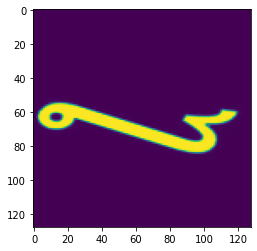

In [28]:
# Testing Image Loader and Feature Extraction
path = '/content/drive/MyDrive/ImgRecPJ2/ไ4.jpg';

# path = '/content/drive/MyDrive/ImgRecPJ2/Tr/2/text (20).bmp';

img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) #ปรับรูปภาพให้อยู่ใน Gray scale เพื่อให้สามารถทำ Radon ได้
img = np.invert(img) #ปรับสีจากขาวเป็นดำสลับกัน
img = cv2.resize(img, (128,128), interpolation = cv2.INTER_AREA) #ปรับขนาดภาพให้เป็น 128 x 128

# print(img.shape)

featureTs = [] #สร้าง array ไว้เก็บ feature ที่ได้จากการสกัดข้อมูลตัวทดสอบ

#ทำ Opening เพื่อย่อเเละเพิ่มขนาดของวัตถุหรือเส้นขอบให้สกัดรูปภาพ(ตัวอักษรหนา)ได้ดีขึ้น
filt = np.ones((2,2)) # กำหนดขนาด filter ใช้ทำ Opening
#img  = cv2.dilate(img, filt, iterations = 1) #ทำ Dialtion 1 รอบ
img  = cv2.morphologyEx(img, cv2.MORPH_CLOSE, filt) #ทำ Closing Operation

plt.imshow(img)

hist = hog.compute(img,winStride,padding,locations) # ทำสกัด Feature ของรูปภาพ

tta = np.linspace(0., 180., max(img.shape), endpoint=False) #สร้างองศาของการหา Radon แบบอัตโนมัติด้วย linspace
sinogram = skt.radon(img, theta=tta) #ได้เป็นผลลัพธ์หลังจากทำการ Sum ของมูลในแต่ละองศาที่อยู่บนโดเมน Radon
reshapesinogram = np.array(sinogram).reshape(-1,1) #แปลงให้เป็น vector และให้ data type เป็น numpy array และแปลงให้เป็น vector แนวนอน
concatlistfeature = np.concatenate((hist, reshapesinogram)) #นำ feature array ของ HOG และ Radon มาต่อกันเป็น feature array เดียวกัน

# featureTs.append(concatlistfeature)
featureTs = np.array(concatlistfeature).reshape(1,-1) #แปลง vector ให้เหมาะกับ KNN

labelTs = 6 #กำหนด Class lable ของข้อมูลเทศที่เป็นไปได้เท่ากับ 6 Class

# print(featureTs.shape)
# print(concatlistfeature.shape)

classifier = sn.KNeighborsClassifier(n_neighbors=1) # กำหนดค่าหาเพื่อนบ้านที่ใกล์ที่สุด k ตัว ของ ที่ใช้ classifierข้อมูล
classifier.fit(featureTr, labelTr) # เรียนรู้ข้อมูลเเล้วสร้างโมเดลใช้ทำนายค่า
out = classifier.predict(featureTs) # ทำนายข้อมูลวางอยู่
print('Answer is ' + str(out)); #แสดงคำตอบของการ Classify

### **Accuracy**

In [21]:
from sklearn.model_selection import train_test_split # import  sklearn.model_selection เพื่อเเบ่งข้อมูล
x_train, x_test, y_train, y_test = train_test_split(featureTr,labelTr,test_size=0.30,random_state=42) 
#หลังจาก การสกัด Feature ของรูปภาพ ทำการเเบ่งข้อมูล test  30% , train 70 %
# Importing and fitting KNN classifier for k=7
from sklearn.neighbors import KNeighborsClassifier # Import KNN classifier
knn = KNeighborsClassifier(n_neighbors=1) # กำหนดค่าหาเพื่อนบ้านที่ใกล์ที่สุด  7 ตัว หรือ k = 7
knn.fit(x_train,y_train) # เรียนรู้ข้อมูลเเล้วสร้างโมเดลใช้ทำนายค่า
# Predicting results using Test data set
pred = knn.predict(x_test) # ทำนายกลุ่มข้อมูล
from sklearn.metrics import accuracy_score # import sklearn.metrics เพื่อใช้ทำนายความเเม่นยำของโมเดล
accuracy_score(pred,y_test) #ทดสอบเเล้วเเสดง ผลการทดสอบความเเม่นยำของโมเดล

1.0

In [22]:
# ทดสอบค่า k ที่ใช้ ทำ classifier(K-Nearest Neighbors) ข้อมูล
knn_r_acc = [] # สร้าง array เก็บผลการทดลองค่าความเเม่นยำของ การเลือกใช้ จำนวน k 1-17 ตัว
for i in range(1,20,1): # loop ทดลองค่าความเเม่นยำของ การเลือกใช้ จำนวน k 1-17 ตัว
    knn = sn.KNeighborsRegressor(n_neighbors=i) # กำหนด k ที่ใช้ทดเเต่ละครั้ง
    knn.fit(x_train,y_train) # เรียนรู้ข้อมูลเเล้วสร้างโมเดลเเต่ละรอบ
    test_score = knn.score(x_test,y_test) # ทำนายเเละเก็บค่า score ของ test เเต่ละรอบ
    train_score = knn.score(x_train, y_train) #ทำนายเเละเก็บค่า score ของ train เเต่ละรอบ
    knn_r_acc.append((i, test_score ,train_score)) # เก็บ ข้อมูล ผลการทดลอง score  ใน array ชื่อ knn_r_acc
df = pd.DataFrame(knn_r_acc, columns=['K','Test Score','Train Score']) 
# นำข้อมูลที่เก็บผลการทดลอง ทำเป็น dataframe
print(df) # เเสดงผลการทดสอบ

     K  Test Score  Train Score
0    1    1.000000     1.000000
1    2    0.977569     0.940692
2    3    0.936860     0.909754
3    4    0.879742     0.899981
4    5    0.863218     0.874871
5    6    0.829964     0.855249
6    7    0.820955     0.826856
7    8    0.783941     0.810202
8    9    0.714453     0.762918
9   10    0.691144     0.763533
10  11    0.686001     0.761772
11  12    0.657297     0.742218
12  13    0.678320     0.733837
13  14    0.660985     0.712097
14  15    0.658067     0.687141
15  16    0.648223     0.666676
16  17    0.635025     0.655694
17  18    0.594449     0.643297
18  19    0.569183     0.614264
